# Binary Relevance

In this notebook, I will use the `BinaryRelevance()` from the `scikit-multilearn`.

Note: This is one of the most basic approaches to multi-label classification, it ignores relationships between labels.

In [64]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, hamming_loss, f1_score, confusion_matrix
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

## Loading the data

In [2]:
import os
# Set the working directory
os.chdir(r'/Users/saram/Desktop/Erdos_Institute/project/Data')

In [3]:
# Read train features
mars_data = pd.read_csv("../Data/train_features_new_with_PCA.csv")
mars_data.set_index(mars_data.sample_id, inplace=True)
mars_data

,sample_id,basalt,carbonate,chloride,iron_oxide,oxalate,oxychlorine,phyllosilicate,silicate,sulfate,...,2.12,0.13,1.13,2.13,0.14,1.14,2.14,0.15,1.15,2.15
sample_id,,,,,,,,,,,,,,,,,,,,,
S0000,S0000,0,0,0,0,0,0,0,0,1,...,-0.09684,-0.983755,-0.177357,-0.178857,-0.559546,-0.15498,-0.039571,-0.362594,2.270000e-15,1.300000e-15
S0001,S0001,0,1,0,0,0,0,0,0,0,...,-0.09684,-0.983755,-0.177357,-0.178857,-0.559546,-0.15498,-0.039571,-0.362594,2.270000e-15,1.300000e-15
S0002,S0002,0,0,0,0,0,1,0,0,0,...,-0.09684,-0.983755,-0.177357,-0.178857,-0.559546,-0.15498,-0.039571,-0.362594,2.270000e-15,1.300000e-15
S0003,S0003,0,1,0,1,0,0,0,0,1,...,-0.09684,-0.983755,-0.177357,-0.178857,-0.559546,-0.15498,-0.039571,-0.362594,2.270000e-15,1.300000e-15
S0004,S0004,0,0,0,1,0,1,1,0,0,...,-0.09684,-0.983755,-0.177357,-0.178857,-0.559546,-0.15498,-0.039571,-0.362594,2.270000e-15,1.300000e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S0749,S0749,0,0,0,0,0,0,0,0,0,...,-0.09684,-0.983755,-0.177357,-0.178857,-0.559546,-0.15498,-0.039571,-0.362594,2.270000e-15,1.300000e-15
S0750,S0750,0,0,0,0,0,0,1,0,0,...,-0.09684,-0.983755,-0.177357,-0.178857,-0.559546,-0.15498,-0.039571,-0.362594,2.270000e-15,1.300000e-15
S0751,S0751,0,0,0,0,0,0,0,1,0,...,-0.09684,-0.983755,-0.177357,-0.178857,-0.559546,-0.15498,-0.039571,-0.362594,2.270000e-15,1.300000e-15


In [4]:
print(mars_data.columns)

Index(['sample_id', 'basalt', 'carbonate', 'chloride', 'iron_oxide', 'oxalate',
       'oxychlorine', 'phyllosilicate', 'silicate', 'sulfate', 'sulfide', '0',
       '1', '2', '0.1', '1.1', '2.1', '0.2', '1.2', '2.2', '0.3', '1.3', '2.3',
       '0.4', '1.4', '2.4', '0.5', '1.5', '2.5', '0.6', '1.6', '2.6', '0.7',
       '1.7', '2.7', '0.8', '1.8', '2.8', '0.9', '1.9', '2.9', '0.10', '1.10',
       '2.10', '0.11', '1.11', '2.11', '0.12', '1.12', '2.12', '0.13', '1.13',
       '2.13', '0.14', '1.14', '2.14', '0.15', '1.15', '2.15'],
      dtype='object')


## Data Preprocessing

In [5]:
# Data preprocessing 
# Drop 'sample_id' and separate features and target labels
X = mars_data.drop(columns=['sample_id', 'basalt', 'carbonate', 'chloride', 'iron_oxide', 'oxalate', 'oxychlorine',
                       'phyllosilicate', 'silicate', 'sulfate', 'sulfide'])
y = mars_data[['basalt', 'carbonate', 'chloride', 'iron_oxide', 'oxalate', 'oxychlorine',
          'phyllosilicate', 'silicate', 'sulfate', 'sulfide']]

In [6]:
# Ensure we have correct dimensions
print(X.shape)
print(y.shape)

(754, 48)
(754, 10)


In [7]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [59]:
labels = ['basalt', 'carbonate', 'chloride', 'iron_oxide', 'oxalate', 'oxychlorine',
          'phyllosilicate', 'silicate', 'sulfate', 'sulfide']  # Label columns

## Visualize class distribution for each label

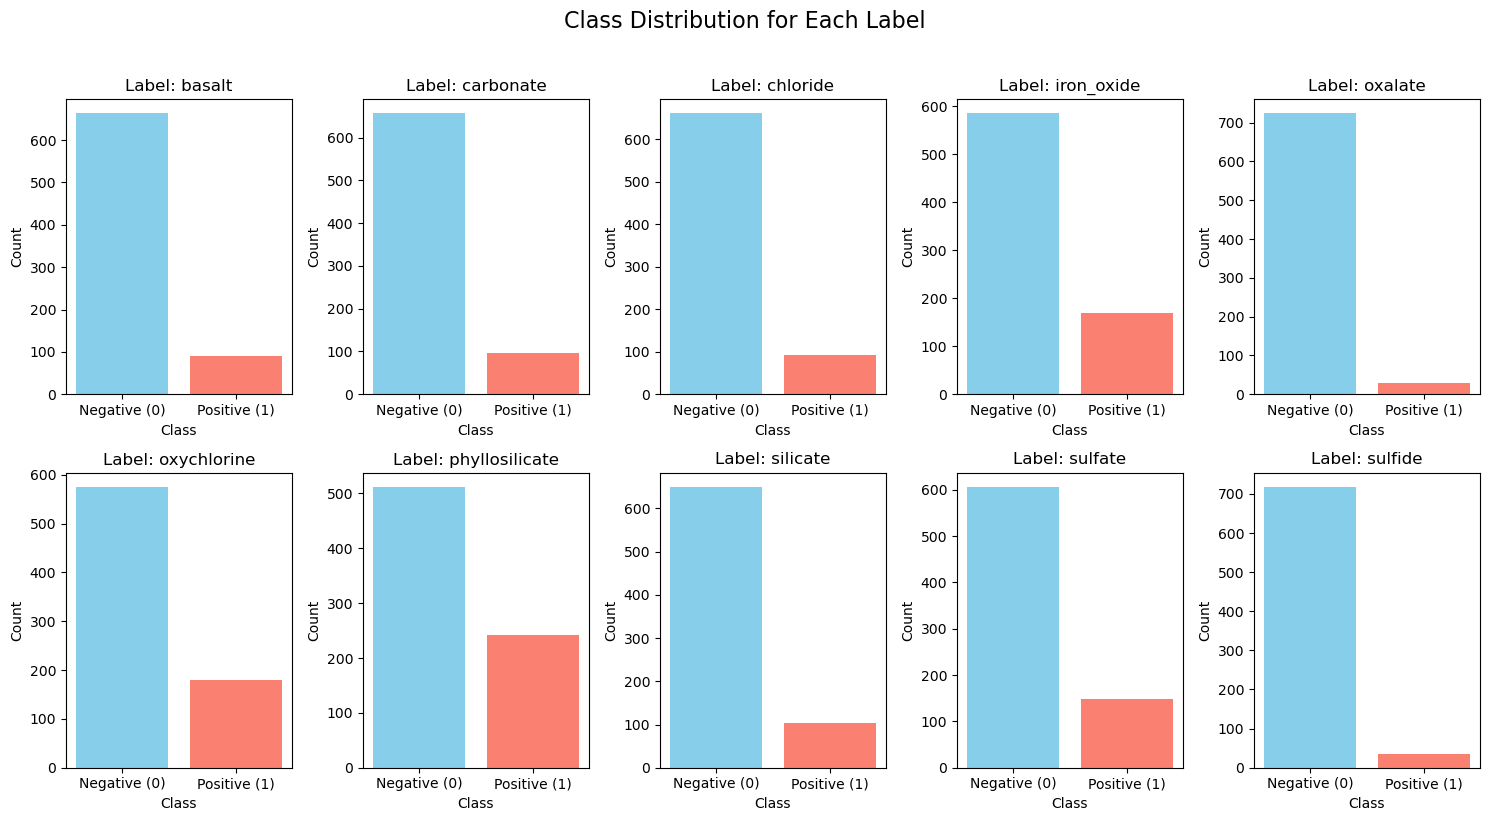

In [60]:
# Visualize class distribution for each label
plt.figure(figsize=(15, 8))

for i, label in enumerate(labels):
    class_counts = mars_data[label].value_counts()
    plt.subplot(2, 5, i + 1)  # Assuming you have 10 labels (adjust rows/columns as needed)
    plt.bar(class_counts.index, class_counts.values, color=['skyblue', 'salmon'])
    plt.title(f"Label: {label}")
    plt.xticks([0, 1], labels=['Negative (0)', 'Positive (1)'])
    plt.ylabel("Count")
    plt.xlabel("Class")
    plt.tight_layout()

plt.suptitle("Class Distribution for Each Label", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

It seems like we are dealing with higly imbalanced data. 

## Binary Relevance 

Performs classification for each label individually.

Converts a multi-label classification problem with L labels into L separate binary classification problems, each using the base classifier specified in the constructor. The final prediction is the combination of the results from all individual label classifiers.

### Model 1: Support Vector Machine (SVC)

In [53]:
# Initialize Binary Relevance with SVC as the base classifier
classifier_svc = BinaryRelevance(
    classifier = SVC(),
    require_dense = [False, True]
)
# Train the model
classifier_svc.fit(X_train, y_train)

# Make predictions
predictions_svc = classifier_svc.predict(X_test)

# Calculate accuracy
accuracy_svc = accuracy_score(y_test, predictions_svc)
print("Accuracy for the SVC model:", accuracy_svc)

# Hamming Loss: Fraction of incorrect labels
hamming_svc = hamming_loss(y_test, predictions_svc)
print("Hamming Loss for the SVC model:", hamming_svc)

Accuracy for the SVC model: 0.15894039735099338
Hamming Loss for the SVC model: 0.14834437086092717


In [ ]:
# Generate the classification report
report = classification_report(y_test, predictions_svc)

print("Classification Report for the SVC model:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        33
           4       0.00      0.00      0.00         9
           5       1.00      0.03      0.06        34
           6       0.79      0.23      0.35        48
           7       0.00      0.00      0.00        19
           8       0.00      0.00      0.00        32
           9       0.00      0.00      0.00         4

   micro avg       0.75      0.05      0.10       232
   macro avg       0.18      0.03      0.04       232
weighted avg       0.31      0.05      0.08       232
 samples avg       0.08      0.04      0.05       232



c:\Users\saram\anaconda3\envs\erdos_fall_2024\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\saram\anaconda3\envs\erdos_fall_2024\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\saram\anaconda3\envs\erdos_fall_2024\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is"

### Model 2: Logistic Regression

In [54]:
# Initialize Binary Relevance with Logistic Regression as the base classifier
classifier_lr = BinaryRelevance(classifier=LogisticRegression(max_iter=100))

# Train the model
classifier_lr.fit(X_train, y_train)

# Make predictions
predictions_lr = classifier_lr.predict(X_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, predictions_lr)
print("Accuracy for the Log Regression model:", accuracy_lr)

# Hamming Loss: Fraction of incorrect labels
hamming_lr = hamming_loss(y_test, predictions_lr)
print("Hamming Loss for the Log Regression model:", hamming_lr)


Accuracy for the Log Regression model: 0.23178807947019867
Hamming Loss for the Log Regression model: 0.13642384105960265


In [40]:
# Generate the classification report
report = classification_report(y_test, predictions_lr)

print("Classification Report for the Log Regression model:\n", report)

Classification Report for the Log Regression model:
               precision    recall  f1-score   support

           0       0.75      0.16      0.26        19
           1       0.50      0.14      0.22        14
           2       1.00      0.20      0.33        20
           3       0.60      0.36      0.45        33
           4       1.00      0.22      0.36         9
           5       0.58      0.21      0.30        34
           6       0.65      0.23      0.34        48
           7       0.75      0.16      0.26        19
           8       1.00      0.12      0.22        32
           9       1.00      0.25      0.40         4

   micro avg       0.68      0.21      0.32       232
   macro avg       0.78      0.21      0.32       232
weighted avg       0.74      0.21      0.32       232
 samples avg       0.21      0.17      0.18       232



c:\Users\saram\anaconda3\envs\erdos_fall_2024\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\saram\anaconda3\envs\erdos_fall_2024\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\saram\anaconda3\envs\erdos_fall_2024\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize

### Model 3: K-Nearest Neighbors (KNN)

In [56]:
# Initialize Binary Relevance with KNeighborsClassifier as the base classifier
classifier_knn = BinaryRelevance(classifier=KNeighborsClassifier(n_neighbors=5))

# Train the model
classifier_knn.fit(X_train, y_train)

# Make predictions
predictions_knn = classifier_knn.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, predictions_knn)
print("Accuracy for the KNN model:", accuracy_knn)

# Hamming Loss: Fraction of incorrect labels
hamming_knn = hamming_loss(y_test, predictions_knn)
print("Hamming Loss for the KNN model:", hamming_knn)

Accuracy for the KNN model: 0.5033112582781457
Hamming Loss for the KNN model: 0.09205298013245033


In [49]:
# Generate the classification report
report = classification_report(y_test, predictions_knn)

print("Classification Report for the KNN model:\n", report)

Classification Report for the KNN model:
               precision    recall  f1-score   support

           0       0.78      0.37      0.50        19
           1       0.67      0.71      0.69        14
           2       0.60      0.15      0.24        20
           3       0.76      0.48      0.59        33
           4       1.00      0.78      0.88         9
           5       0.82      0.82      0.82        34
           6       0.72      0.71      0.72        48
           7       0.65      0.58      0.61        19
           8       0.76      0.69      0.72        32
           9       1.00      0.25      0.40         4

   micro avg       0.75      0.60      0.67       232
   macro avg       0.78      0.55      0.62       232
weighted avg       0.75      0.60      0.65       232
 samples avg       0.55      0.50      0.51       232



c:\Users\saram\anaconda3\envs\erdos_fall_2024\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\saram\anaconda3\envs\erdos_fall_2024\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\saram\anaconda3\envs\erdos_fall_2024\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize

### Model 4: Random Forest Classifier

In [58]:
# Initialize Binary Relevance with RandomForestClassifier as the base classifier
classifier_rf = BinaryRelevance(classifier=RandomForestClassifier(n_estimators=100))

# Train the model
classifier_rf.fit(X_train, y_train)

# Make predictions
predictions_rf = classifier_rf.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, predictions_rf)
print("Accuracy for the Random Forest Classifier model:", accuracy_rf)

# Hamming Loss: Fraction of incorrect labels
hamming_rf = hamming_loss(y_test, predictions_rf)
print("Hamming Loss for the Random Forest model:", hamming_rf)

Accuracy for the Random Forest Classifier model: 0.48344370860927155
Hamming Loss for the Random Forest model: 0.08211920529801324


In [44]:
# Generate the classification report
report = classification_report(y_test, predictions_rf)

print("Classification Report for the Random Forest Classifier model:\n", report)

Classification Report for the Random Forest Classifier model:
               precision    recall  f1-score   support

           0       0.86      0.32      0.46        19
           1       0.80      0.57      0.67        14
           2       1.00      0.40      0.57        20
           3       0.77      0.52      0.62        33
           4       1.00      0.78      0.88         9
           5       0.86      0.74      0.79        34
           6       0.91      0.67      0.77        48
           7       0.71      0.26      0.38        19
           8       0.95      0.62      0.75        32
           9       1.00      0.50      0.67         4

   micro avg       0.88      0.56      0.68       232
   macro avg       0.89      0.54      0.66       232
weighted avg       0.88      0.56      0.67       232
 samples avg       0.51      0.46      0.47       232



c:\Users\saram\anaconda3\envs\erdos_fall_2024\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\saram\anaconda3\envs\erdos_fall_2024\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\saram\anaconda3\envs\erdos_fall_2024\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize

It seems like the Random Forest model performs better (has higher accuracy and low hamming loss), which makes sense since the data is imbalanced.

## References:

- [Multi-Label Classification in Python](http://scikit.ml/index.html)
- [Binary Relevance](http://scikit.ml/api/skmultilearn.problem_transform.br.html#binary-relevance)
